In [25]:
# Load data
import glob
X_train = []
Y_train = []
for filename in glob.glob('./train/pos/*.txt'):
    X_train.append(open(filename, 'r+').read())
    Y_train.append(1)
for filename in glob.glob('./train/neg/*.txt'):
    X_train.append(open(filename, 'r+').read())
    Y_train.append(0)

In [26]:
pickle.dump(X_test)

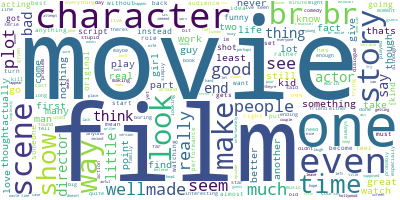

In [39]:
from wordcloud import WordCloud
long_string = ','.join(X_train[12500:])
wordcloud = WordCloud(background_color="white", max_words=10000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [41]:
cv = CountVectorizer(max_df=0.85, ngram_range=(1,3), lowercase=False)
word_count_vector = cv.fit_transform(X_train)
list(cv.vocabulary_.keys())[:20]

['enjoyed',
 'longstreet',
 'followed',
 'steps',
 'raymond',
 'burrs',
 'successful',
 'ironside',
 'tv',
 'series',
 'intended',
 'give',
 'competition',
 'show',
 'canceled',
 'one',
 'season',
 'decidedi',
 'believe',
 'wronglythat']

In [42]:
tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
training_data = tfidf_transformer.fit_transform(word_count_vector)

In [51]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(training_data, Y_train)

/home/teko/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

array([0])

In [55]:
## Test

In [56]:
X_test = []
Y_test = []
for filename in glob.glob('./test/pos/*.txt'):
    X_test.append(open(filename, 'r+').read())
    Y_test.append(1)
for filename in glob.glob('./test/neg/*.txt'):
    X_test.append(open(filename, 'r+').read())
    Y_test.append(0)

In [57]:
temp = []
for sent in X_test:
    s = ""
    for c in sent:
        if c not in string.punctuation:
            s += c
    s = s.lower()
    s1 = ""
    for word in s.split():
        if word not in stopwords.words('english'):
            s1 += word
            s1 += " "
#     s = s.replace(" ", "-")
    temp.append(s1)
X_test = temp

In [58]:
pickle.dump(X_test, open('./X_test.pkl', 'wb'))
pickle.dump(Y_test, open('./Y_test.pkl', 'wb'))

In [59]:
word_count_vector_testing = cv.transform(X_test)
testing_data = tfidf_transformer.transform(word_count_vector_testing)

In [67]:
from sklearn.metrics import accuracy_score, f1_score
accuracy_score(Y_test, clf.predict(testing_data))

0.87264

In [71]:
f1_score(Y_test, clf.predict(testing_data), average='weighted')

0.8726388229789465

(array([1]), 1)